In [15]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

fnames = glob('/Users/joshuafass/src_backbone_torsions/*.npy')
len(fnames)

788

In [2]:
fnames[0]

'/Users/joshuafass/src_backbone_torsions/run0-clone0_backbone_torsions.npy'

In [3]:
def parse_run_from_fname(fname):
    start = fname.find('/run') + 4
    end = fname.find('-clone')
    return int(fname[start:end])
parse_run_from_fname(fnames[0]), parse_run_from_fname(fnames[-1])

(0, 99)

In [4]:
# for now, let me just look at a particular pair of RUNs: first, what do the distributions look like?
X = np.load(fnames[0])

In [5]:
# so there are a thousand here, and we should recall that these are sins and cosines of angles
X.shape

(5320, 1012)

In [6]:
np.arccos(X[:,0])

array([ 2.04579735,  1.53733039,  1.86796951, ...,  1.56466341,
        1.48882687,  2.26974821], dtype=float32)

In [7]:
import pyemma

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# first, let's generate a thousand histograms?

run_0 = []
run_1 = []

X_raw = []
Y_raw = []

for fname in fnames:
    try:
        raw = np.load(fname)
        x = np.arctan2(raw[:,::2], raw[:,1::2]) + np.pi
        run = parse_run_from_fname(fname)
        if run == 0:
            run_0.append(x)
            X_raw.append(raw)
        if run == 1:
            run_1.append(x)
            Y_raw.append(raw)
    except:
        print('Something went wrong!')

Something went wrong!


In [9]:
starting_0 = np.vstack([x[0] for x in run_0])
starting_1 = np.vstack([x[0] for x in run_1])
starting_0.shape, starting_1.shape

((13, 506), (14, 506))

In [10]:
X = np.vstack(run_0)
Y = np.vstack(run_1)

In [11]:
X.shape

(58516, 506)

In [14]:
xlim = 0, 2 * np.pi
plt.hist(X[:,0],bins=100,histtype='stepfilled',alpha=0.5,normed=True);
plt.hist(Y[:,0],bins=100,histtype='stepfilled',alpha=0.5,normed=True);
plt.xlabel('Angle (radians)')
plt.ylabel('Observed probability density')
plt.title('')
plt.xlim(*xlim)

(0, 6.283185307179586)

In [30]:
# let me grab the feature names real quick, so I can label the plots properly

In [31]:
# let me also find the argmax_i of D_KL(p(X[:,i]), p(Y[:,i])), the torsion with the most different of a distribution here

In [32]:
import mdtraj as md
src_traj = md.load('run0-clone0.h5')

In [ ]:
import nglview
view = nglview.show_mdtraj(src_traj[::10].superpose(src_traj,0))
view

In [33]:
import nglview
view = nglview.show_mdtraj(src_traj[::10].superpose(src_traj,0))
view.clear_representations()
#view.add_cartoon()
view.add_backbone()
view

In [34]:
feat_src = pyemma.coordinates.featurizer(src_traj.top)
feat_src.add_backbone_torsions()
feats = feat_src.describe()

In [35]:
starting_0.shape

(13, 506)

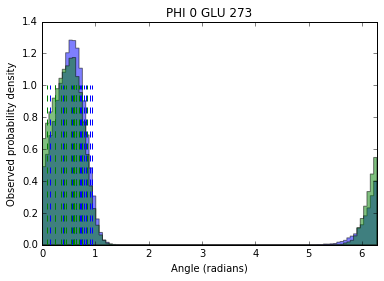

In [36]:
def plot(i):
    plt.hist(X[:,i],bins=100,histtype='stepfilled',alpha=0.5,normed=True);
    plt.hist(Y[:,i],bins=100,histtype='stepfilled',alpha=0.5,normed=True);
    plt.xlabel('Angle (radians)')
    plt.ylabel('Observed probability density')
    plt.title(feats[i])
    
    plt.vlines(starting_0[:,i],0,1,color='blue',linestyles='--')
    plt.vlines(starting_1[:,i],0,1,color='green',linestyles='--')
    plt.xlim(*xlim)
plot(4)

In [37]:
from scipy.stats import entropy
from tqdm import tqdm
# get histograms
X_hists = []
Y_hists = []
KL_divs = []

n_bins = 100
xlim = 0, 2 * np.pi

for i in tqdm(range(len(feat_src.describe()))):
    X_hists.append(np.histogram(X[:,i],bins=n_bins,range=xlim)[0])
    Y_hists.append(np.histogram(Y[:,i],bins=n_bins,range=xlim)[0])
    KL_divs.append(entropy(X_hists[i]+1, Y_hists[i]+1))

100%|██████████| 506/506 [00:00<00:00, 575.25it/s]


In [38]:
np.max(KL_divs), np.argmax(KL_divs)

(8.6881729235109351, 436)

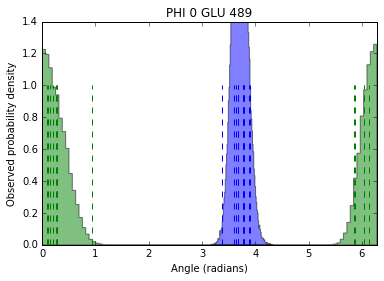

In [39]:
plot(np.argmax(KL_divs))

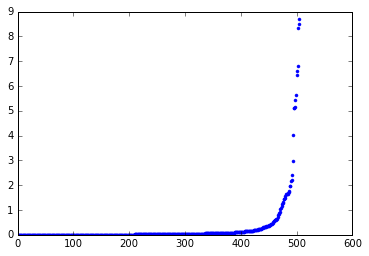

In [40]:
plt.plot(sorted(KL_divs),'.')

In [41]:
inds = np.argsort(KL_divs)[::-1]

In [42]:
inds[0]

436

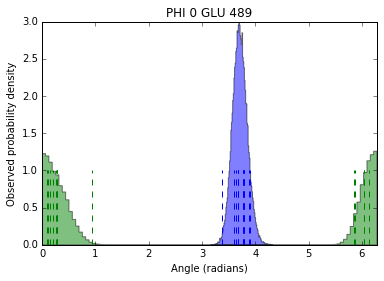

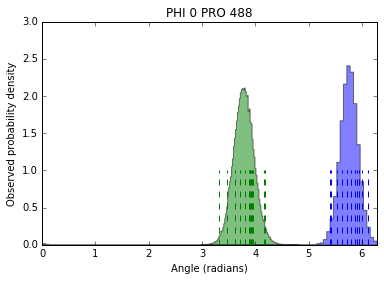

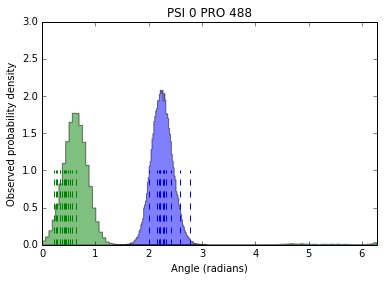

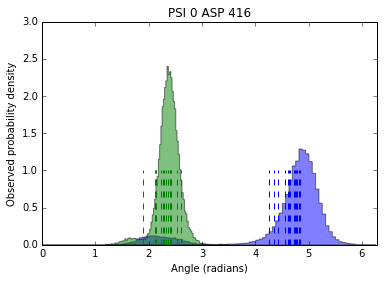

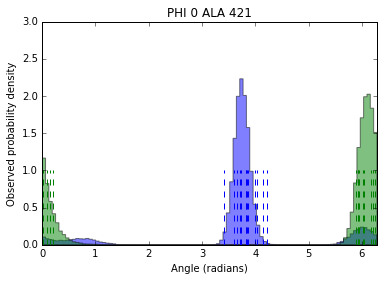

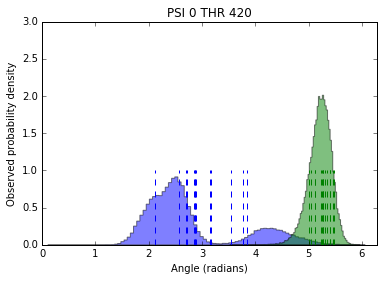

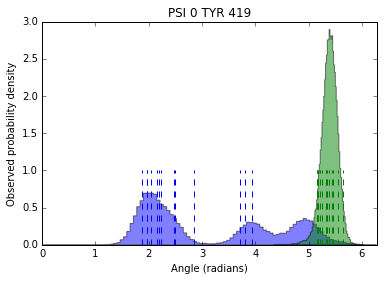

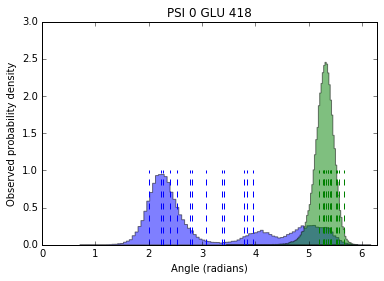

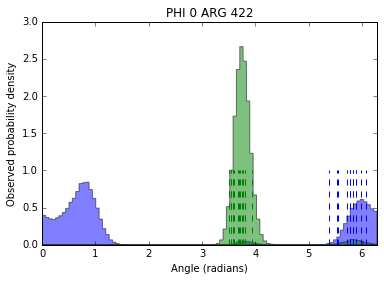

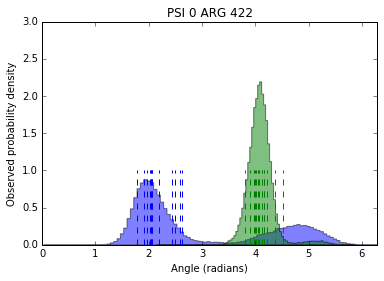

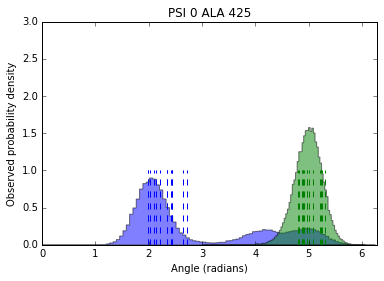

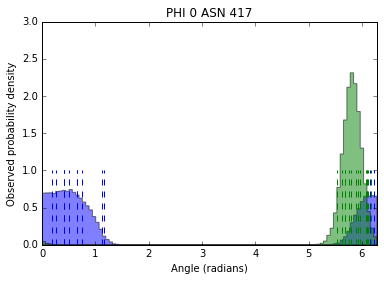

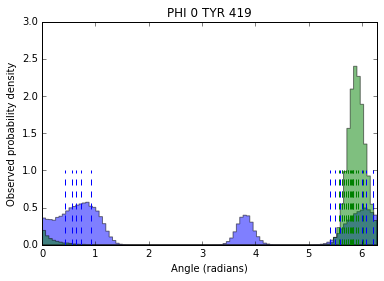

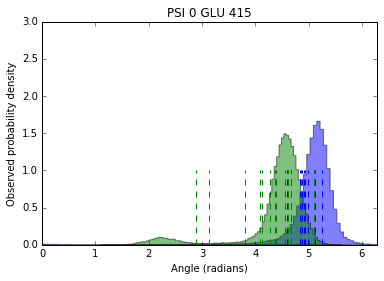

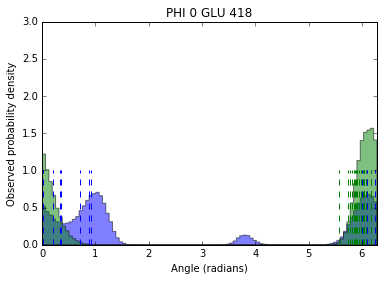

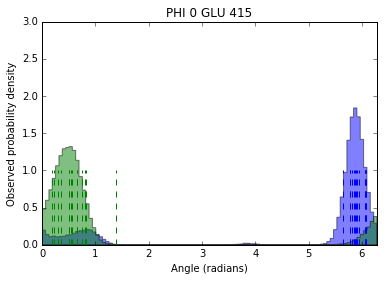

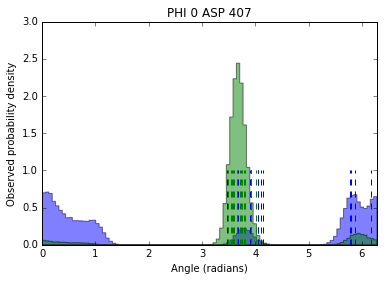

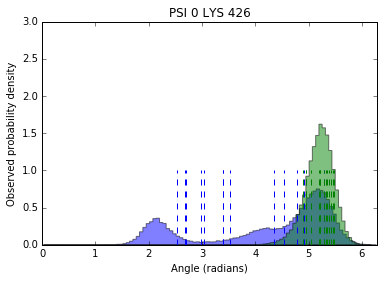

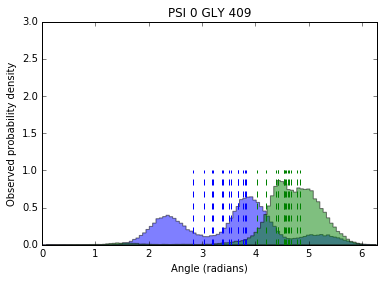

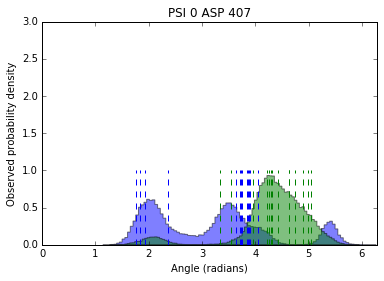

In [43]:
for i in inds[:20]:
    plt.figure()
    plot(i)
    plt.ylim(0,3)
    #plt.yscale('log')

In [1]:
# okay, let's look at the energy term!

from simtk.openmm import app
import simtk.openmm as mm
from simtk.unit import *
import openmmtools
from openmmtools.integrators import kB

forcefield = app.ForceField('amber99sbildn.xml', 'tip3p')

temperature = 300*kelvin

system = forcefield.createSystem(src_traj.topology.to_openmm(), nonbondedMethod=app.CutoffNonPeriodic,
    nonbondedCutoff=1.0*nanometers, constraints=app.HBonds, rigidWater=True)

IOError: [Errno 2] No such file or directory: '/Users/joshuafass/anaconda/lib/python2.7/site-packages/simtk/openmm/app/data/tip3p'

In [66]:
# what's the index of that completely disconnected 

In [67]:
system.getForces()

[<simtk.openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x14f67f5d0> >,
 <simtk.openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x14f67f720> >,
 <simtk.openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x14f67f7b0> >,
 <simtk.openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x14f67f5a0> >,
 <simtk.openmm.openmm.GBSAOBCForce; proxy of <Swig Object of type 'OpenMM::GBSAOBCForce *' at 0x14f67f780> >,
 <simtk.openmm.openmm.CMMotionRemover; proxy of <Swig Object of type 'OpenMM::CMMotionRemover *' at 0x14f67f900> >]

In [68]:
torsions = system.getForce(2)

In [119]:
worst_feature_index = inds[0]
feat_torsions = feat_src.active_features[0]
worst_dih_inds = feat_torsions.angle_indexes[worst_feature_index]

In [120]:
worst_dih_inds

array([3509, 3511, 3513, 3524])

In [121]:
feat_src.describe()[worst_feature_index]

u'PHI 0 GLU 489'

In [122]:
force_term_inds = []
all_angles = []

for i in range(torsions.getNumTorsions()):
    abcd = torsions.getTorsionParameters(i)[:4]
    if set(abcd) == set(worst_dih_inds):
        print('Found one!')
        force_term_inds.append(i)
    all_angles.append(abcd)

Found one!
Found one!


In [123]:
for i in force_term_inds:
    print(torsions.getTorsionParameters(i))

[3509, 3511, 3513, 3524, 3, Quantity(value=0.0, unit=radian), Quantity(value=1.75728, unit=kilojoule/mole)]
[3509, 3511, 3513, 3524, 2, Quantity(value=0.0, unit=radian), Quantity(value=1.12968, unit=kilojoule/mole)]


In [124]:
def parse_torsion_parameters(torsion_parameters):
    param_dict = dict()
    #param_dict['a'] = torsion_parameters[0]
    #param_dict['b'] = torsion_parameters[1]
    #param_dict['c'] = torsion_parameters[2]
    #param_dict['d'] = torsion_parameters[3]
    param_dict['n'] = torsion_parameters[4]
    param_dict['theta_0'] = torsion_parameters[5]
    param_dict['k'] = torsion_parameters[6]
    return param_dict

def periodic_torsion_force(theta, theta_0, k, n):
    return k * (1 + np.cos(n*theta - theta_0 / radian))

param_dicts = [parse_torsion_parameters(torsions.getTorsionParameters(i)) for i in force_term_inds]

In [125]:
x = np.linspace(0, 2 * np.pi, 1000)
y = sum([periodic_torsion_force(x, **p) for p in param_dicts])

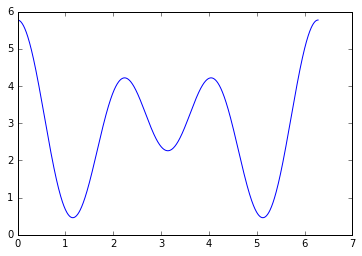

In [126]:
plt.plot(x,y)

In [127]:
q = np.exp(-y * kilojoule_per_mole / (kB * temperature))
q /= np.trapz(q, x)

(0.0, 6.2831853071795862)

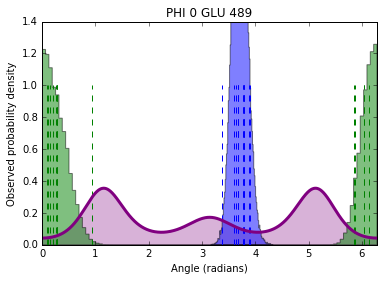

In [128]:
plot(worst_feature_index)

plt.plot(x,q,linewidth=3,color='purple')
plt.fill_between(x,q,alpha=0.3, color='purple')
plt.xlim(x[0],x[-1])

In [129]:
# plot_

In [130]:
DFG_flip = [2190,2188,2198,2203]

In [131]:
[i for i in range(len(feat_torsions.describe())) if set(feat_torsions.angle_indexes[i]) == set(DFG_flip)]

[]

In [132]:
np.min(feat_torsions.angle_indexes), np.max(feat_torsions.angle_indexes)

(0, 4088)

In [133]:
np.min(all_angles), np.max(all_angles)

(0, 4090)

In [134]:
# starting structures



In [135]:
# hmm maybe that didn't work!
# let's see if they're still separable if I omit that feature

In [136]:
i,j = 2 * worst_feature_index, 2 * worst_feature_index + 1
i,j

(872, 873)

In [137]:
X_ = np.vstack(X_raw)
Y_ = np.vstack(Y_raw)

In [138]:
ndim = X_.shape[1]
censored_set = set(range(ndim))-set([i,j])
len(censored_set), ndim

(1010, 1012)

In [49]:
censored_inds = np.array(sorted(censored_set))
censored_inds

array([   0,    1,    2, ..., 1009, 1010, 1011])

In [51]:
X_censored = X_[:,censored_inds]
Y_censored = Y_[:,censored_inds]

ins = np.vstack((X_censored, Y_censored))
outs = np.hstack((np.zeros(len(X_)), np.ones(len(Y_))))

ins.shape, outs.shape

((114273, 1010), (114273,))

In [53]:
from sklearn.linear_model import LogisticRegression


In [142]:
lr = LogisticRegression(penalty='l1')


lr.fit(ins, outs)
lr.score(ins, outs)

1.0

In [143]:
sum(lr.coef_==0)

950

In [176]:
# full / un-censored
ins = np.vstack((X_, Y_))
outs = np.hstack((np.zeros(len(X_)), np.ones(len(Y_))))
lr = LogisticRegression(penalty='l1',C=0.001)
lr.fit(ins, outs)
lr.score(ins, outs)

1.0

In [177]:
np.sum(lr.coef_!=0)

2

In [178]:
lr.coef_.shape

(1, 1012)

In [179]:
discriminative_features = np.arange(len(lr.coef_[0]))[lr.coef_[0]!=0]

In [181]:
feat_src_cossin = pyemma.coordinates.featurizer(src_traj.top)
feat_src_cossin.add_backbone_torsions(cossin=True)

In [182]:
interesting_residues = [int(feat_src_cossin.describe()[i].split()[-1][:-1]) for i in discriminative_features]

In [183]:
len(interesting_residues)

2

In [184]:
len(set(interesting_residues))

2

In [185]:
res = ', '.join([str(a) for a in sorted(set(interesting_residues))])
res

'488, 489'

In [186]:
# let me just highlight the residues in question

import nglview
view = nglview.show_mdtraj(src_traj[::10].superpose(src_traj,0))
view.clear_representations()
view.add_cartoon()
#view.add_backbone()
view.add_hyperball(selection=res, color='red')
view

In [ ]:
atoms = [a for a in src_traj.top.atoms]
[atoms[a] for a in 

In [187]:
# how many times can I remove all discriminative features?

In [ ]:
current_censored_set = set()
scores = []
censored_sets = []

for i in range(10):
    X_censored = X_[:,censored_inds]
    Y_censored = Y_[:,censored_inds]

    ins = np.vstack((X_censored, Y_censored))
    outs = np.hstack((np.zeros(len(X_)), np.ones(len(Y_))))

In [191]:
# which of the features has any informaation about c?
from sklearn.feature_selection import chi2, f_classif
chi2, pval = chi2(X_, outs)

ValueError: Input X must be non-negative.

In [192]:
np.min(X_)

-1.0

In [194]:
F, pval = f_classif(ins, outs)

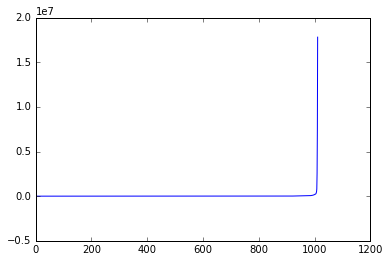

In [196]:
plt.plot(sorted(F))

In [199]:
np.max(pval), np.min(pval)

(nan, nan)

In [200]:
pval

array([  3.14585397e-106,   7.30624862e-008,   1.66745930e-004, ...,
         6.38431409e-052,   6.92883754e-001,   2.36543268e-011])

In [202]:
F[10], pval[10]

(187.62216, 1.1353878807045007e-42)

In [205]:
ins = np.vstack((X_, Y_))
outs = np.hstack((np.zeros(len(X_)), np.ones(len(Y_))))
ins.shape, outs.shape

((114273, 1012), (114273,))

In [19]:
from sklearn.lda import LDA
lda = LDA(n_components=1)

/Users/joshuafass/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [213]:
%%time
lda.fit(ins_[::10],outs[::10])

CPU times: user 87.3 ms, sys: 7.49 ms, total: 94.8 ms
Wall time: 45.7 ms


LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [214]:
lda.score(ins_,outs)

0.99497694118470681

In [220]:
len(feat_src.describe())

506

In [23]:
from tqdm import tqdm

In [39]:
# X_raw, Y_raw are the raw torsion angles for each
X_ = np.vstack(X_raw)
Y_ = np.vstack(Y_raw)

# if I used just a small random subset of features, can I still get high classification accuracy?
# --> if so, then this result isn't extremely sensitive to a single isolate region of the protein.
ins = np.vstack((X_, Y_))
outs = np.hstack((np.zeros(len(X_)), np.ones(len(Y_))))

def subset_classifiability(ins, outs, n_features, n_iterations= 100, train_stride=10):
    scores = []
    np.random.seed(0)
    all_indices = np.arange(ins.shape[1])
    train_stride = 10
    for i in tqdm(range(n_iterations)):
        np.random.shuffle(all_indices)
        ins_ = ins[:,all_indices[:n_features]]

        #clf = LogisticRegression(penalty='l1')
        clf = LDA(n_components=1)

        clf.fit(ins_[::train_stride], outs[::train_stride])
        score = clf.score(ins_, outs)
        scores.append(score)
    return scores

In [40]:
all_scores = []
for fraction in [0.1,0.25,0.5]:
    n_features = int(fraction*ins.shape[1])
    print(fraction, n_features)
    all_scores.append(subset_classifiability(ins, outs, n_features))
    print(np.mean(all_scores[-1]))

  0%|          | 0/100 [00:00<?, ?it/s]

(0.1, 101)


  0%|          | 0/100 [00:00<?, ?it/s]

0.987397372958
(0.25, 253)


  0%|          | 0/100 [00:00<?, ?it/s]

0.999685139972
(0.5, 506)


100%|██████████| 100/100 [03:27<00:00,  2.46s/it]

0.99999667463


In [41]:
# what fraction are perfectly classified?
[np.sum(np.array(s)==1) for s in all_scores]

[15, 54, 95]

In [43]:
[np.mean(s) for s in all_scores]

[0.98739737295774144, 0.99968513997182185, 0.99999667463005271]

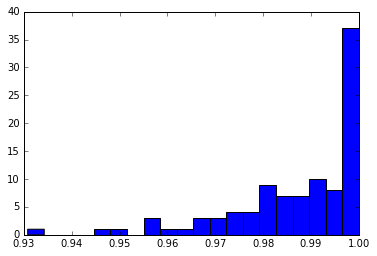

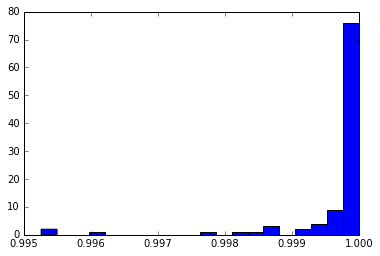

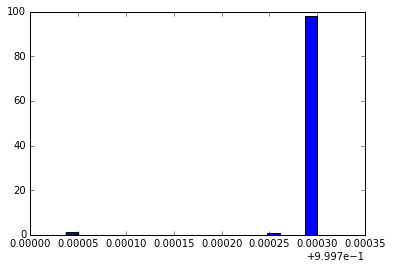

In [42]:
# what are the score distributions?
for scores in all_scores:
    plt.figure()
    plt.hist(scores, bins=20);